# Introducción

El Encuesta Nacional de Inclusión Financiera (ENIF) de 2021 proporciona una visión detallada sobre el estado de la inclusión financiera en México.

Esta encuesta tiene como objetivo medir el acceso y uso de productos y servicios financieros por parte de la población adulta en el país. Los datos recogidos ofrecen datos sobre la tenencia de cuentas de ahorro, el uso de herramientas de crédito, y las estrategias de manejo financiero para enfrentarse a desafíos económicos.

A través de ENIF, es posible identificar las brechas existentes en la educación financiera y las áreas donde se necesitan esfuerzos adicionales para mejorar la inclusión financiera.

El proposito central es comprender el nivel de **Educación Financiera** en el sector.

In [1]:
pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 28.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import os
import matplotlib.pyplot as plt
from pywaffle import Waffle

import warnings
warnings.simplefilter('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def leer_catalogo(catalog_folder, filename, encoding='utf-8'):

    catalog_path = os.path.join(catalog_folder, filename)
    df_catalog = pd.read_csv(catalog_path, encoding=encoding)
    return pd.Series(df_catalog.descrip.values, index=df_catalog.cve).to_dict()

def aplicar_mapeo(df, mapeos):

    for col, mapping in mapeos.items():
        if col in df.columns:
            df[col] = df[col].replace(mapping)
    return df

file_path = '/content/drive/MyDrive/FINANZAS/ENIF/conjunto_de_datos_tmodulo_enif_2021.csv'
catalog_folder = '/content/drive/MyDrive/FINANZAS/ENIF/catalogos'

columnas_de_interes = ['FOLIO', 'P3_5', 'P3_8A', 'P4_3', 'P4_1', 'P4_2_1', 'P4_2_2', 'P4_4_1', 'P4_4_2', 'P4_4_3', 'P4_4_4', 'P4_4_5', 'P4_4_6', 'P4_5', 'P4_7_1', 'P4_8_1', 'P4_8_2', 'P4_8_3', 'P4_8_4', 'P4_8_5', 'P4_8_6', 'P5_4_4', 'P5_7_4', 'P8_1', 'SEXO', 'EDAD']

df_General = pd.read_csv(file_path, usecols=columnas_de_interes, encoding='latin1')

mapeos = {}

for filename in os.listdir(catalog_folder):
    if filename.endswith('.csv'):
        column_name = filename.split('.')[0]
        mapeos[column_name] = leer_catalogo(catalog_folder, filename, encoding='latin1')

df_General = aplicar_mapeo(df_General, mapeos)

df_General.head()


,FOLIO,P3_5,P3_8A,P4_1,P4_2_1,P4_2_2,P4_3,P4_4_1,P4_4_2,P4_4_3,...,P4_8_2,P4_8_3,P4_8_4,P4_8_5,P4_8_6,P5_4_4,P5_7_4,P8_1,SEXO,EDAD
0,1,No trabajó,NaN,No,No,Sí,Sí,NaN,NaN,NaN,...,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,No,NaN,No,Mujer,83
1,2,Trabajó por lo menos una hora,1250.0,No,No,No,No,Sí,No,No,...,De acuerdo,En desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,No,NaN,No,Mujer,33
2,3,Trabajó por lo menos una hora,1000.0,No,No,No,No,Sí,Sí,Sí,...,De acuerdo,En desacuerdo,En desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,No,NaN,No,Hombre,30
3,4,Se dedica a los quehaceres del hogar o a cuida...,NaN,No,No,No,No,Sí,No,No,...,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,No,NaN,No,Mujer,64
4,5,No trabajó,NaN,No,No,No,No,Sí,Sí,No,...,De acuerdo,En desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,No,NaN,No,Hombre,70


# Descripción

| Columna | Descripción |
|---------|-------------|
| `P3_5` | Durante el mes pasado, ¿usted...? |
| `P3_8A` | ¿Cuánto gana o recibe usted por trabajar (su actividad)? |
| `P4_1` | ¿Lleva un presupuesto o un registro de sus ingresos y gastos? |
| `P4_2_1` | ¿Hace anotaciones de los gastos? |
| `P4_2_2` | ¿Mantiene el dinero para pagos o deudas separado del dinero del gasto diario? |
| `P4_3` | De julio de 2020 a la fecha, ¿lo que ganó o recibió cada mes fue suficiente para cubrir sus gastos?
|PREGUNTA | **La ultima vez que no pudo cubrir sus gastos...** |
| `P4_4_1` | ¿Pidió prestado a familiares o personas conocidas? |
| `P4_4_2` | ¿Utilizó el dinero que tenía ahorrado? |
| `P4_4_3` | ¿Redujo sus gastos? |
| `P4_4_4` | ¿Vendió o empeñó algún bien? |
| `P4_4_5` | ¿Solicitó un adelanto salarial, trabajó horas extras o hizo trabajo temporal? |
| `P4_4_6` | ¿Utilizó su tarjeta de crédito o solicitó un crédito en un banco o institución financiera? |
| --- | --- |
| `P4_5` | ¿Ha tomado algún curso sobre cómo ahorrar, cómo hacer un presupuesto o sobre el uso responsable del crédito? |
| --- | --- |
| `P4_7_1` | ¿Sabe qué es la inflación a simples rasgos? |
| PREGUNTA | **En qué grado o medida está de acuerdo o en desacuerdo...** |
| `P4_8_1` | ¿Suele pensar en el presente sin preocuparse por el futuro? |
| `P4_8_2` | ¿El dinero está para gastarse? |
| `P4_8_3` | ¿Mantiene una revisión detallada del manejo de su dinero? |
| `P4_8_4` | ¿Dada su situación económica, siente que tendrá las cosas que desea? |
| `P4_8_5` | ¿Le alcanza bien el dinero para cubrir sus gastos? |
| `P4_8_6` | ¿Se siente tranquila(o) de que su dinero sea suficiente? |
| --- | --- |
| `P5_4_4` | ¿Tiene cuenta de ahorro? |
| `P5_7_4` | ¿Guardó o ahorró en su cuenta de ahorro? |
| `P8_1` |  ¿Usted tiene algún seguro de auto, de casa, de vida, de gastos médicos u otro? |


# Código

In [5]:
nombres_columnas = {
    'P5_14': 'Actividades del mes pasado',
    'P3_8A': 'Ingreso mensual por trabajo',
    'P4_1': 'Registra ingresos y gastos',
    'P4_3': 'Ingreso suficiente para cubrir gastos desde julio 2020',
    'P4_2_1': 'Anotaciones de gastos',
    'P4_2_2': 'Dinero separado para pagos y gastos diarios',
    'P4_4_1': 'Préstamos a conocidos',
    'P4_4_2': 'Uso de ahorros',
    'P4_4_3': 'Reducción de gastos',
    'P4_4_4': 'Venta o empeño de bienes',
    'P4_4_5': 'Adelanto salarial/trabajo extra',
    'P4_4_6': 'Uso de tarjeta de crédito o préstamo bancario',
    'P4_5': 'Cursos sobre ahorro y presupuestos',
    'P4_7_1': 'Conocimiento básico de inflación',
    'P4_8_1': 'Enfoque en el presente',
    'P4_8_2': 'Gasto del dinero',
    'P4_8_3': 'Revisión detallada del dinero',
    'P4_8_4': 'Optimismo económico',
    'P4_8_5': 'Dinero suficiente para gastos',
    'P4_8_6': 'Tranquilidad financiera',
    'P5_4_4': 'Cuenta de ahorro',
    'P5_7_4': 'Ahorro en cuenta',
    'P8_1' : "Seguro"
}


df_General.rename(columns=nombres_columnas, inplace=True)

df_General

,FOLIO,P3_5,Ingreso mensual por trabajo,Registra ingresos y gastos,Anotaciones de gastos,Dinero separado para pagos y gastos diarios,Ingreso suficiente para cubrir gastos desde julio 2020,Préstamos a conocidos,Uso de ahorros,Reducción de gastos,...,Gasto del dinero,Revisión detallada del dinero,Optimismo económico,Dinero suficiente para gastos,Tranquilidad financiera,Cuenta de ahorro,Ahorro en cuenta,Seguro,SEXO,EDAD
0,1,No trabajó,NaN,No,No,Sí,Sí,NaN,NaN,NaN,...,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,No,NaN,No,Mujer,83
1,2,Trabajó por lo menos una hora,1250.0,No,No,No,No,Sí,No,No,...,De acuerdo,En desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,No,NaN,No,Mujer,33
2,3,Trabajó por lo menos una hora,1000.0,No,No,No,No,Sí,Sí,Sí,...,De acuerdo,En desacuerdo,En desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,No,NaN,No,Hombre,30
3,4,Se dedica a los quehaceres del hogar o a cuida...,NaN,No,No,No,No,Sí,No,No,...,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,No,NaN,No,Mujer,64
4,5,No trabajó,NaN,No,No,No,No,Sí,Sí,No,...,De acuerdo,En desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,No,NaN,No,Hombre,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13549,13348,No trabajó,NaN,No,No,Sí,No,Sí,No,Sí,...,De acuerdo,En desacuerdo,De acuerdo,En desacuerdo,En desacuerdo,No,NaN,No,Hombre,65
13550,13349,Trabajó por lo menos una hora,1800.0,Sí,No,Sí,No,Sí,Sí,Sí,...,De acuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,No,NaN,No,Hombre,60
13551,13350,Se dedica a los quehaceres del hogar o a cuida...,NaN,Sí,No,Sí,No,No,No,Sí,...,Ni de acuerdo ni en desacuerdo,De acuerdo,En desacuerdo,En desacuerdo,En desacuerdo,No,NaN,No,Mujer,20
13552,13351,Trabajó por lo menos una hora,2100.0,No,No,No,No,No,Sí,No,...,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,No,NaN,No,Hombre,43


In [6]:
df_General.isnull().sum()

,0
FOLIO,0
P3_5,0
Ingreso mensual por trabajo,4673
Registra ingresos y gastos,0
Anotaciones de gastos,0
Dinero separado para pagos y gastos diarios,0
Ingreso suficiente para cubrir gastos desde julio 2020,0
Préstamos a conocidos,6954
Uso de ahorros,6954
Reducción de gastos,6954


# Personas Encuestadas Sexo y Edad

De primeras tenemos una muestra de la cantidad de personas encuestadas, su sexo y el grupo de edad al que pertenecen.

In [7]:
conteo_sexo = df_General['SEXO'].value_counts()

fig = px.pie(conteo_sexo,
             names=conteo_sexo.index,
             values=conteo_sexo.values,
             hole=.3,
             title='Distribución de Hombres y Mujeres en la encuesta',
             color_discrete_sequence=px.colors.qualitative.Dark2)

fig.show()

In [8]:
bins = [18, 30, 50, 70, float('inf')]
labels = ['18-30', '31-50', '51-70', '71+']

df_General['GRUPO_EDAD'] = pd.cut(df_General['EDAD'], bins=bins, labels=labels, right=False)

conteo_grupos = df_General['GRUPO_EDAD'].value_counts().sort_index()

total_personas = df_General.shape[0]

conteo_grupos['Total'] = total_personas

fig_barras = px.bar(conteo_grupos,
                    color=conteo_grupos.index,
                    color_discrete_sequence=px.colors.qualitative.Dark2,
                    title='Distribución de Edad de los Encuestados',
                    labels={'index': 'Grupo de Edad', 'value': 'Cantidad'},
                    text_auto=True)
fig_barras.show()


In [9]:
df_General.columns


Index(['FOLIO', 'P3_5', 'Ingreso mensual por trabajo',
       'Registra ingresos y gastos', 'Anotaciones de gastos',
       'Dinero separado para pagos y gastos diarios',
       'Ingreso suficiente para cubrir gastos desde julio 2020',
       'Préstamos a conocidos', 'Uso de ahorros', 'Reducción de gastos',
       'Venta o empeño de bienes', 'Adelanto salarial/trabajo extra',
       'Uso de tarjeta de crédito o préstamo bancario',
       'Cursos sobre ahorro y presupuestos',
       'Conocimiento básico de inflación', 'Enfoque en el presente',
       'Gasto del dinero', 'Revisión detallada del dinero',
       'Optimismo económico', 'Dinero suficiente para gastos',
       'Tranquilidad financiera', 'Cuenta de ahorro', 'Ahorro en cuenta',
       'Seguro', 'SEXO', 'EDAD', 'GRUPO_EDAD'],
      dtype='object')

---

# Ingresos y egresos.

Se evalua las cantidades que se gana, actividades que se ejercen, modo de gasto y uso del mismo.

La idea es poder **Visualizar las cantiades que ingresan y salen** en un promedio.

In [10]:
bins = [0, 1, 1000, 5000, 10000, 20000, 30000, 40000, 50000, 98000, 98888, float('inf')]
labels = ['No recibe ingresos', '0-1k', '+1k', '+5k', '+10k', '+20k', '+30k', '+40k', '+50k', '98k o más', 'No responde']

df_General['Grupo_Ingreso'] = pd.cut(df_General['Ingreso mensual por trabajo'], bins=bins, labels=labels, right=False, include_lowest=True)

conteo_grupos_ingreso = df_General['Grupo_Ingreso'].value_counts().sort_index()

fig_barras = px.bar(
    conteo_grupos_ingreso,
    title='Distribución de Ingresos por Actividad',
    labels={'index': 'Grupo de Ingreso', 'value': 'Cantidad'},
    text_auto=True,
    color=conteo_grupos_ingreso.index,
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig_barras.show()


Podemos notar que **Una gran parte de la población** Recibe ingresos superiores a los **Mil Pesos Mexicanos** Inferiores a los **Cinco Mil Pesos Mexcianos**

Algo importante a destacar es que aquellos con **Ingresos Nulos** (0) son aquellos que **Ejercen alguna actividad, pero no se les es remunerada**

Aquellos que **No respondierón** Se encuentran en un punto donde **No Trabajan** y **No realizan ninguna actividad**

In [11]:
df_General.head(                                                                                                                                                                               )

,FOLIO,P3_5,Ingreso mensual por trabajo,Registra ingresos y gastos,Anotaciones de gastos,Dinero separado para pagos y gastos diarios,Ingreso suficiente para cubrir gastos desde julio 2020,Préstamos a conocidos,Uso de ahorros,Reducción de gastos,...,Optimismo económico,Dinero suficiente para gastos,Tranquilidad financiera,Cuenta de ahorro,Ahorro en cuenta,Seguro,SEXO,EDAD,GRUPO_EDAD,Grupo_Ingreso
0,1,No trabajó,NaN,No,No,Sí,Sí,NaN,NaN,NaN,...,En desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,No,NaN,No,Mujer,83,71+,NaN
1,2,Trabajó por lo menos una hora,1250.0,No,No,No,No,Sí,No,No,...,En desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,No,NaN,No,Mujer,33,31-50,+1k
2,3,Trabajó por lo menos una hora,1000.0,No,No,No,No,Sí,Sí,Sí,...,En desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,No,NaN,No,Hombre,30,31-50,+1k
3,4,Se dedica a los quehaceres del hogar o a cuida...,NaN,No,No,No,No,Sí,No,No,...,En desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,No,NaN,No,Mujer,64,51-70,NaN
4,5,No trabajó,NaN,No,No,No,No,Sí,Sí,No,...,En desacuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,No,NaN,No,Hombre,70,71+,NaN


# Conocimiento Basico de Finanzas

---

In [12]:
import pandas as pd
import plotly.express as px

conteo_cursos = df_General['Cursos sobre ahorro y presupuestos'].value_counts()

data_cursos = conteo_cursos.to_dict()

fig_cursos = px.pie(
    names=data_cursos.keys(),
    values=data_cursos.values(),
    hole=.3,
    title='"¿Ha tomado algún curso sobre Ahorros y Presupuestos?"',
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig_cursos.show()


**El 92.6% de la población NO ha tomado un Curso sobre Ahorros o Presupuestos(Finanzas Basicas)**

Mientras que **Unicamente un 7.42% SI ha tomado** algun curso referente al tema

---

## "¿La inflación significa que aumenta el precio de las cosas?"

Se le hizo esta pregunta a la población.

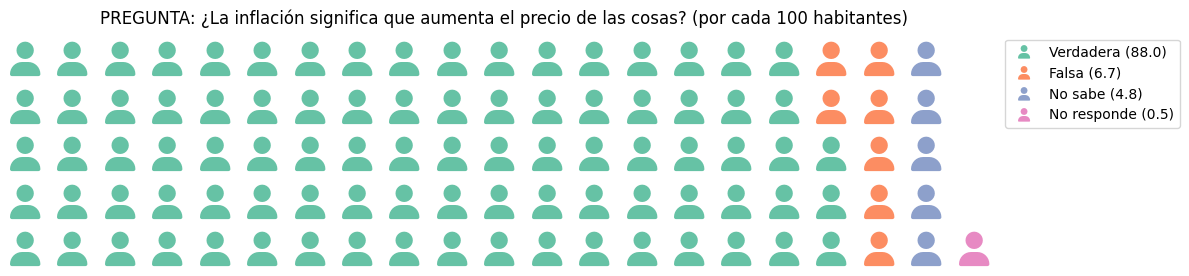

In [13]:
conteo_inflacion = df_General['Conocimiento básico de inflación'].value_counts()

proporciones_inflacion = (conteo_inflacion / conteo_inflacion.sum()) * 100

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=proporciones_inflacion,
    labels=[f"{k} ({v:.1f})" for k, v in proporciones_inflacion.items()],
    title={'label': 'PREGUNTA: ¿La inflación significa que aumenta el precio de las cosas? (por cada 100 habitantes)', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='user', icon_size=25, icon_legend=True,
    figsize=(12, 8),
)

plt.show()


**88% de la población** Estuvo de acuerdo con dicha pregunta. \\
**6.7%** En desacuerdo \\
**4.8%** No sabía \\
**0.5%%** No respondió

# Presupuesto o un registro de sus ingresos y gastos

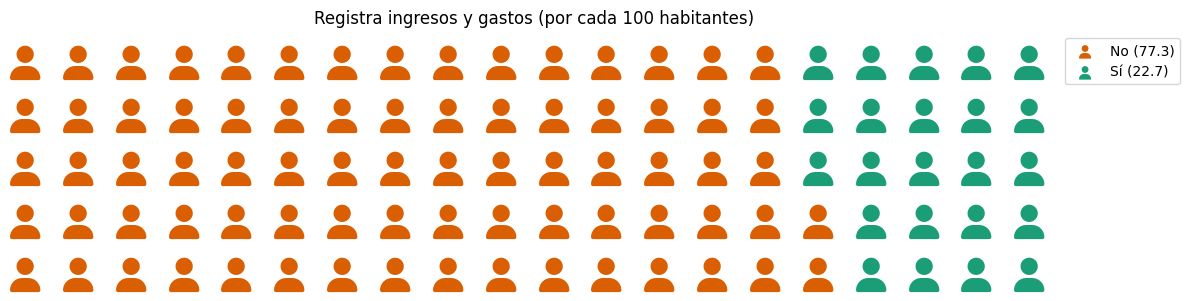

In [14]:
conteo_presupuesto = df_General['Registra ingresos y gastos'].value_counts()

proporciones_presupuesto = (conteo_presupuesto / conteo_presupuesto.sum()) * 100

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=proporciones_presupuesto,
    labels=[f"{k} ({v:.1f})" for k, v in proporciones_presupuesto.items()],
    title={'label': 'Registra ingresos y gastos (por cada 100 habitantes)', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='user', icon_size=25, icon_legend=True,
    figsize=(12, 8),
    colors=["#D95F02", "#1B9E77"]
)

plt.show()


De primeras, podemos notar que en una normalización de **Cada 1000 Habitantes**

Unicamente **23 de cada 100 mantienen un control tangible de sus Ingresos y egresos**

Esto bien **No significa que todos tengan un mal manejo de su dinero** pero representa una gran problematica al no tener **un registro contable de cada uno de sus gastos** dejando a disposición cualquier gasto no autorizado o contemplado.

---

# Anotaciones de los gastos

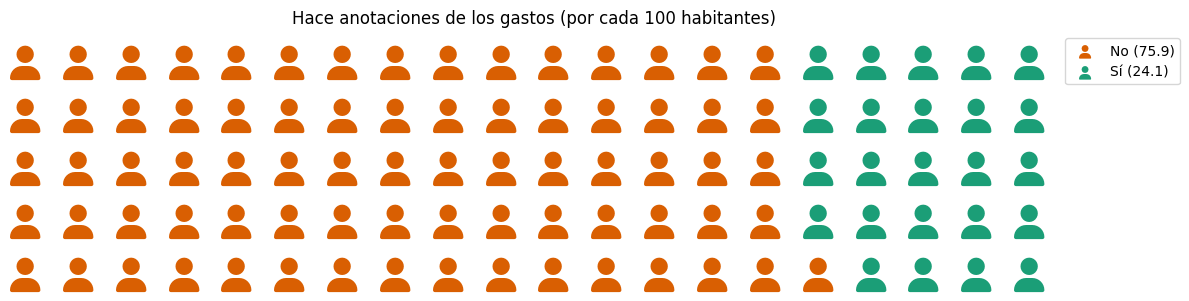

In [15]:
conteo_anotaciones = df_General['Anotaciones de gastos'].value_counts()

proporciones_anotaciones = (conteo_anotaciones / conteo_anotaciones.sum()) * 100

fig_anotaciones = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=proporciones_anotaciones,
    labels=[f"{k} ({v:.1f})" for k, v in proporciones_anotaciones.items()],
    title={'label': 'Hace anotaciones de los gastos (por cada 100 habitantes)', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='user', icon_size=25, icon_legend=True,
    figsize=(12, 8),
    colors=["#D95F02", "#1B9E77"]
)

plt.show()


**24 de cada 100 Habitantes** realizan anotaciones sobre sus gastos.

Siendo esta una **Practica Negativa** a la hora del manejo de las finanzas.

No solo deja a la deriva gastos inesperados, si no que tambien permite un flujo contante de perdida de dinero sin saber el origen.

---

# Separa Dinero de Pagos/Deudas del Dinero Diario

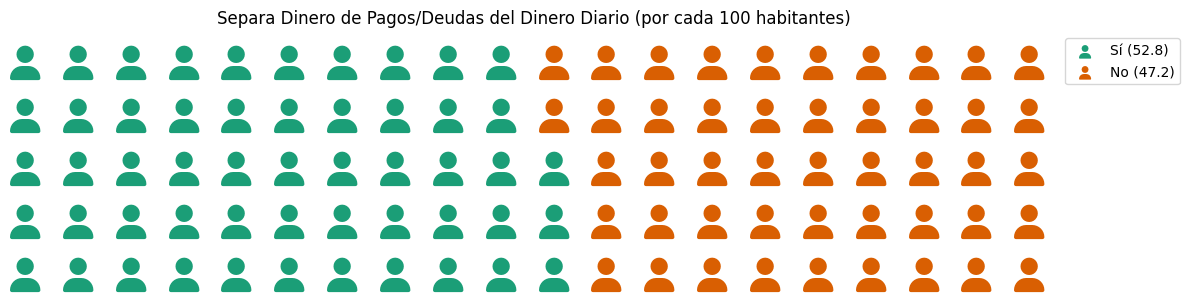

In [16]:
conteo_separado = df_General['Dinero separado para pagos y gastos diarios'].value_counts()

proporciones_separado = (conteo_separado / conteo_separado.sum()) * 100

fig_separado = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=proporciones_separado,
    labels=[f"{k} ({v:.1f})" for k, v in proporciones_separado.items()],
    title={'label': 'Separa Dinero de Pagos/Deudas del Dinero Diario (por cada 100 habitantes)', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='user', icon_size=25, icon_legend=True,
    figsize=(12, 8),
    colors=["#1B9E77", "#D95F02"]
)

plt.show()


**53 de cada 100 Habitantes** Separa el dinero de sus Deudas del dinero que usa en su día a día.

Estos resulta en una buena practica que permite no gastar más dinero del que se tiene permitido.

Si bien **En esta ocasión son números positivos** sigue siendo una **Diferencia muy baja** apenas tangible.

---

# Dinero Prestado

In [17]:
conteo_gastos = df_General['Ingreso suficiente para cubrir gastos desde julio 2020'].value_counts()

data_gastos = conteo_gastos.to_dict()

fig = px.pie(
    names=data_gastos.keys(),
    values=data_gastos.values(),
    hole=.3,
    title='Suficiencia de Ingresos para Cubrir Gastos (Julio 2020 a la Fecha)',
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.show()


Podemos ver que el **48.7% (6600 persona)s** No tuvierón suficientes **Ingresos** para cubrir sus **Gastos**

## ¿Que hicierón aquellos que no cubrierón sus gastos?

In [18]:
columnas = [
    'Préstamos a conocidos',
    'Uso de ahorros',
    'Reducción de gastos',
    'Venta o empeño de bienes',
    'Adelanto salarial/trabajo extra',
    'Uso de tarjeta de crédito o préstamo bancario'
]

conteo_respuestas = {columna: df_General[columna].value_counts().get('Sí', 0) for columna in columnas}

df_barras = pd.DataFrame(list(conteo_respuestas.items()), columns=['Acción', 'Cantidad'])

fig = px.bar(
    df_barras,
    x='Acción',
    y='Cantidad',
    title='¿Qué hicieron aquellos que no cubrieron sus gastos?',
    labels={'Cantidad': 'Número de Personas', 'Acción': 'Acción'},
    color='Acción',
    color_discrete_sequence=px.colors.qualitative.Dark2,
)

fig.update_layout(xaxis_tickangle=-45)

fig.show()


Se puede ver una recepción bastante grande a la **Reducciónde Gastos** ante la ausencia de **Dinero Suficiente**

Los **Prestamos a gente cercana** y **El uso de Ahorros** Se encuentran en un punto medio bastante cercano al igualq ue alto, lo que los convierten en opciones **Muy recurrentes**

---

# Tranquilidad Financiera

In [19]:
columnas = [
    'Enfoque en el presente',
    'Gasto del dinero',
    'Revisión detallada del dinero',
    'Optimismo económico',
    'Dinero suficiente para gastos',
    'Tranquilidad financiera'
]

df_afirmaciones = pd.DataFrame()

for columna in columnas:
    conteo_respuestas = df_General[columna].value_counts()
    df_temp = pd.DataFrame(conteo_respuestas).reset_index()
    df_temp.columns = ['Respuesta', 'Cantidad']
    df_temp['Afirmación'] = columna
    df_afirmaciones = pd.concat([df_afirmaciones, df_temp], ignore_index=True)

fig_barras = px.bar(
    df_afirmaciones,
    x='Afirmación',
    y='Cantidad',
    color='Respuesta',
    title='¿Cuál de las siguientes afirmaciones lo identifican más?',
    labels={'Cantidad': 'Número de Personas', 'Afirmación': 'Afirmación'},
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig_barras.update_layout(xaxis_tickangle=-45)

fig_barras.show()


De buenas a primeras notamos una media muy estable, donde gran parte de la población parece estar en un sentimiento **Intermedio**

Sin embargo, de lo poco a mucho que se puede ver de ambos extremos.

Hay mucha gente **De acuerdo (6657)** con la idea de tener una **Revisión Detellada de su Dinero**

A la apr, hay mucha gente **En desacuerdo (5748)** con el concepto de una **Tranquildiad Financiera**

Siendo esto un notorio señalamiento de la limitada solvencia economica que el Pueblo mexicano vive a día de hoy.

# Seguro

In [20]:
conteo_seguro = df_General['Seguro'].value_counts()

conteo_seguro = conteo_seguro.to_dict()

fig = px.pie(
    names=conteo_seguro.keys(),
    values=conteo_seguro.values(),
    hole=.3,
    title='¿Tiene algún seguro privado de auto, casa, vida, gastos médicos u otro?',
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.show()

el **77.7%* de la población no tiene un Seguro de auto, casa, vida o similar.

Lo que resulta en una **Poca o nula** previción a accidentes o imprevistos.

# Cuenta de Ahorro

In [21]:
conteo_cuenta_ahorro = df_General['Cuenta de ahorro'].value_counts()
conteo_ahorro_cuenta = df_General['Ahorro en cuenta'].value_counts()

data_cuenta_ahorro = conteo_cuenta_ahorro.to_dict()
data_ahorro_cuenta = conteo_ahorro_cuenta.to_dict()

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("¿Tiene una cuenta de ahorro?", "¿Guardó o ahorró en su cuenta de ahorro?"), specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=list(data_cuenta_ahorro.keys()), values=list(data_cuenta_ahorro.values()), name="Cuenta de ahorro", hole=.3, marker=dict(colors=px.colors.qualitative.Dark2)), 1, 1)

fig.add_trace(go.Pie(labels=list(data_ahorro_cuenta.keys()), values=list(data_ahorro_cuenta.values()), name="Ahorro en cuenta", hole=.3, marker=dict(colors=px.colors.qualitative.Dark2)), 1, 2)

fig.update_layout(title_text="Distribución de Respuestas sobre Cuentas de Ahorro")

fig.show()


Un **Muy pequeño porcentaje de la población (17.8%)** Tiene una Cuenta de Ahorro

Siendo que solamente el **32.6%** de este mismo sector **Realmente utiliza dicha cuenta**

---

# CONCLUSIÓN

De frente a los multiples analisis, se puede concluir rapidamente que la **Educación Financiera** no prevalece en gran medida.

La toma de decisiones financiera se ve algo **Improvisada**.

El control y manejo de los gastos se ve **Limitado**. \\
Si bien es cierto que suelen dividir en gran medida el dinero debido del disponible. Esto solo representa **Una Medida Basica** para prevenir mal uso del dinero total.

Pues aún así se siguen viendo dificultades para el manejo del dínero de forma constante, o a largo plazo.

No separa la idea completa de un **Uso profundo y Correcto del Dinero**

Se puede estimar **En gran medida** que **La educación Financiera** es *Parcialmente escasa*

In [24]:
df_General.to_csv('/content/drive/MyDrive/FINANZAS/ENIF/df_General_ENIF.csv', index=False)